In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

#Import supplementary visualization code visuals.py
import visuals1 as vs

# Display all visuals inline
%matplotlib inline

# Load the Banknote Authentication dataset
data = pd.read_csv('banknote_authentication.csv')
display(data.head(n=6))

classes = data['class']
features = data.drop('class', axis=1)

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0
5,4.36840,9.6718,-3.9606,-3.16250,0


In [4]:
# autoreload for automatically reloading changes made in visuals.py
%load_ext autoreload
%autoreload 2

In [5]:
display(data.describe())

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


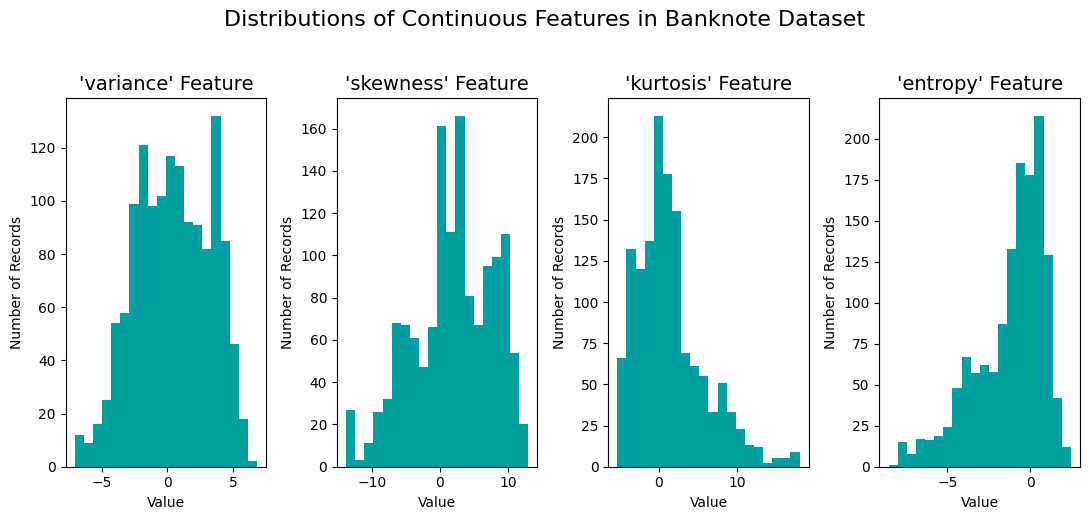

In [24]:
vs.distribution(data)

In [25]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['variance', 'skewness', 'kurtosis', 'entropy']
scaler = MinMaxScaler()
features[numerical] = scaler.fit_transform(features[numerical])

display(features.head(n = 6))
# Import train_test_split from the correct module
from sklearn.model_selection import train_test_split

# Assuming 'features' and 'classes' are already defined
# Split the 'features' and 'classes' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.4, random_state=5)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


,variance,skewness,kurtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362
5,0.822859,0.877275,0.057100,0.489711


Training set has 823 samples.
Testing set has 549 samples.


In [30]:
# Calculate Accuracy
n_records = len(data)
n_fake_notes = len(data[data['class'] == 0])
n_real_notes = len(data[data['class'] == 1])
accuracy = float(n_fake_notes)/n_records

# Calculate F-Score with beta = 2
precision = accuracy
recall = 1
beta = 2
fscore = (1 + beta ** 2) * precision * recall /(beta ** 2 * precision + recall)

# Print the results
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5554, F-score: 0.8620]


In [27]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import confusion_matrix

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}
    beta=2
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    # Calculate the training time
    results['train_time'] = end - start

    # Get the predictions on the test set,
    # then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time

    # Calculate the total prediction time
    results['pred_time'] = end - start

    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)

    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta)

    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta)

    # Compute Confusion Matrix
    results['conf_mat'] = confusion_matrix(y_test, predictions_test)

    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results

In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import visuals1 as vs  # Ensure visuals1.py is in the same directory

# Assuming 'features' and 'classes' are already defined
# Split the 'features' and 'classes' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.4, random_state=5)

# Initialize the three models
clf_A = KNeighborsClassifier(n_neighbors=5)
clf_B = SVC(random_state=5)
clf_C = GradientBoostingClassifier(random_state=5)

# Calculate the number of samples for 5%, 20%, and 100% of the training data
samples_5 = int(X_train.shape[0] * 0.05)
samples_20 = int(X_train.shape[0] * 0.2)
samples_100 = X_train.shape[0]

# Define the train_predict function
def train_predict(clf, sample_size, X_train, y_train, X_test, y_test):
    # Train the classifier on the sample size of the data
    clf.fit(X_train[:sample_size], y_train[:sample_size])

    # Predict on the training and testing set
    y_train_pred = clf.predict(X_train[:sample_size])
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy and F-score
    acc_train = accuracy_score(y_train[:sample_size], y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    f_train = f1_score(y_train[:sample_size], y_train_pred, average='weighted')
    f_test = f1_score(y_test, y_test_pred, average='weighted')
    conf_mat = confusion_matrix(y_test, y_test_pred)

    # Return the results as a dictionary
    return {
        'acc_train': acc_train,
        'acc_test': acc_test,
        'f_train': f_train,
        'f_test': f_test,
        'conf_mat': conf_mat
    }

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_5, samples_20, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Display results
print("\nTrain-Test Scores when trained on entire training set")
for key, value in results.items():
    print(f"For {key} Classifier, scores on training and test set are:")
    print(f"Accuracy on Train set: {value[2]['acc_train']}")
    print(f"Accuracy on Test set: {value[2]['acc_test']}")
    print(f"F-score on Train set: {value[2]['f_train']}")
    print(f"F-score on Test set: {value[2]['f_test']}")
    print(f"Confusion Matrix for test set:\n {value[2]['conf_mat']}")

# Run metrics visualization for the three supervised learning models chosen
# Assuming the function 'vs.evaluate' exists and takes in the required arguments
# vs.evaluate(results, accuracy, fscore)  # Uncomment and modify as needed



Train-Test Scores when trained on entire training set
For KNeighborsClassifier Classifier, scores on training and test set are:
Accuracy on Train set: 0.9987849331713244
Accuracy on Test set: 0.9981785063752276
F-score on Train set: 0.9987851340906335
F-score on Test set: 0.9981787494022523
Confusion Matrix for test set:
 [[294   1]
 [  0 254]]
For SVC Classifier, scores on training and test set are:
Accuracy on Train set: 1.0
Accuracy on Test set: 1.0
F-score on Train set: 1.0
F-score on Test set: 1.0
Confusion Matrix for test set:
 [[295   0]
 [  0 254]]
For GradientBoostingClassifier Classifier, scores on training and test set are:
Accuracy on Train set: 1.0
Accuracy on Test set: 0.994535519125683
F-score on Train set: 1.0
F-score on Test set: 0.9945362482067568
Confusion Matrix for test set:
 [[293   2]
 [  1 253]]


In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
clf = KNeighborsClassifier()

# Create the parameters list you wish to tune
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree']
}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=2)

# Stratified shuffle split cross-validator
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.4, random_state=5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=cv)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized models
predictions = clf.fit(X_train, y_train).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the scores before and after optimization
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta=2)))

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=2)))

print("\n------")
print("Following are the parameters for the optimized model")
print(grid_fit.best_params_)


Unoptimized model
------
Accuracy score on testing data: 0.9982
F-score on testing data: 0.9992

Optimized Model
------
Final accuracy score on the testing data: 0.9982
Final F-score on the testing data: 0.9992

------
Following are the parameters for the optimized model
{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}


In [35]:
acc_scores = []
fbeta_scores = []
k_range = range(1,16)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))
    fbeta_scores.append(fbeta_score(y_test, y_pred, beta=2))

In [37]:
for i in range(len(acc_scores)):
    print ("{}: Accuracy is {}, f-score is {}".format(i+1,acc_scores[i], fbeta_scores[i]))

1: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
2: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
3: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
4: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
5: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
6: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
7: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
8: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
9: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
10: Accuracy is 0.9981785063752276, f-score is 0.999213217938631
11: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
12: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
13: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
14: Accuracy is 0.9890710382513661, f-score is 0.995297805642633
15: Accuracy is 0.9890710382513661, f-score is 0.995297805642633


In [38]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifiers
clf = AdaBoostClassifier(random_state=5)
clf_C = GradientBoostingClassifier(random_state=5)

# Train the supervised models on the training set
model = clf.fit(X_train, y_train)
model_C = clf_C.fit(X_train, y_train)

# Extract the feature importances
importances = model.feature_importances_
importances_C = model_C.feature_importances_

# Print the feature importances
print("Feature Importances with regard to AdaBoost Classifier:")
print(importances)

print("Feature Importances with regard to Gradient Boosting Classifier:")
print(importances_C)


Feature Importances with regard to AdaBoost Classifier:
[0.24 0.28 0.4  0.08]
Feature Importances with regard to Gradient Boosting Classifier:
[0.66918447 0.22385278 0.10323281 0.00372994]
